In [1]:
include("base.jl")
using Images
import Statistics

speckle_noise (generic function with 1 method)

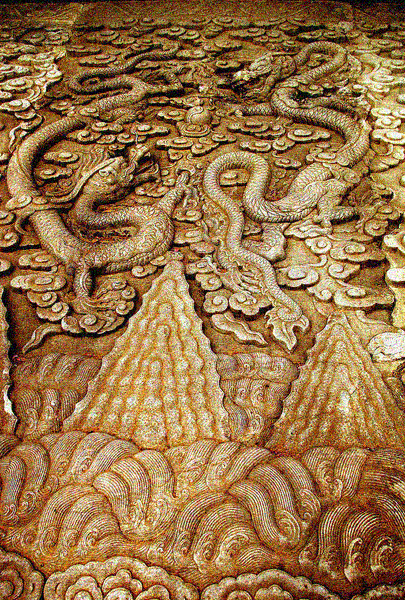

In [26]:
img = load("1.png")
img2 = load("noisy_1.png")

In [27]:
img = convert_to_3d(img)
img2 = convert_to_3d(img2)

600×405×3 Array{Float64, 3}:
[:, :, 1] =
 0.0235294  0.12549   0.0313726   …  0.0431373  0.0         0.0
 0.0862745  0.0       0.145098       0.0        0.0         0.0392157
 0.0705882  0.0       0.12549        0.0117647  0.239216    0.0
 0.0        0.0       0.0431373      0.160784   0.0980392   0.0980392
 0.160784   0.203922  0.0941176      0.0627451  0.262745    0.0117647
 0.2        0.341176  0.172549    …  0.0        0.0392157   0.0
 0.282353   0.290196  0.203922       0.0        0.113725    0.215686
 0.223529   0.352941  0.0705882      0.0431373  0.0235294   0.0862745
 0.054902   0.12549   0.00392157     0.0823529  0.0823529   0.247059
 0.270588   0.168627  0.129412       0.0901961  0.396078    0.180392
 0.168627   0.219608  0.0627451   …  0.109804   0.0941176   0.121569
 0.470588   0.247059  0.192157       0.360784   0.0509804   0.423529
 0.27451    0.27451   0.333333       0.109804   0.00392157  0.101961
 ⋮                                ⋱                         
 0.627451   

In [29]:
assess(PSNR(), img, img2) 

20.509899730993595

In [110]:
function mean_squared_error(image0, image1)
    
    @assert size(image0) == size(image1)
    
    return Statistics.mean((image0 - image1).^2) 
end

mean_squared_error (generic function with 1 method)

In [153]:
function calc_psnr(image_true, image_test)
    err = mean_squared_error(image_true, image_test)
    return 10 * log10(((235.00-16.00)^2) / err)
    #    return 10 * log10((max(maximum(image_true), maximum(image_test))^2) / err) 
end

calc_psnr (generic function with 1 method)

In [155]:
img = load("1.png")
img_ycc = channelview(YCbCr.(img))

3×600×405 reinterpret(reshape, Float32, ::Array{YCbCr{Float32},2}) with eltype Float32:
[:, :, 1] =
  19.6457   18.2682   18.1187   17.2839  …  113.821  111.9     128.623
 126.391   129.169   129.751   127.259      101.28    97.4313   98.1888
 127.846   128.225   128.961   130.196      149.365  159.538   153.604

[:, :, 2] =
  17.265   18.2682   18.3755   16.7704  …  116.536   112.289   101.491
 127.27   129.169   129.603   127.555       88.8062   90.2666   96.0037
 127.704  128.225   129.4     129.318      158.035   158.628   151.468

[:, :, 3] =
  17.265   17.1525   18.1187   18.9037  …  112.777   101.491    81.9929
 127.27   129.318   129.751   126.82        93.9503   96.0037  102.301
 127.704  127.786   128.961   130.268      152.632   151.468   150.029

...

[:, :, 403] =
  18.9921   18.567   18.0449   32.0068  …   24.7308   22.8998   28.0622
 127.264   128.005  126.82    123.718      122.96    126.496   126.49
 128.95    126.754  130.268   136.999      142.933   137.377   138.623

In [156]:
img1 = load("1.png")
img1_ycc = convert.(Float32, channelview(YCbCr.(img1)))

img2 = load("noisy_1.png")
img2_ycc = convert.(Float32, channelview(YCbCr.(img2)))

3×600×405 Array{Float32, 3}:
[:, :, 1] =
  17.5407   27.5237   22.9178   45.2395  …   92.4465  106.677  113.87
 127.111   151.092   127.973   111.122      111.634   117.301   91.3369
 130.635   133.377   134.231   106.668      156.813   165.855  148.076

[:, :, 2] =
  30.0272   21.3848   16.0   20.6016  …  119.303   92.0574   90.7864
 126.348   152.157   128.0  148.643       73.329  111.859   103.174
 137.816   124.071   128.0  124.643      151.005  138.927   151.132

[:, :, 3] =
  18.9355   44.154   24.6088   18.9226  …   73.463  121.926   88.8952
 130.767   111.749  125.014   126.809      116.148  107.011   85.9235
 130.871   130.643  141.769   132.76       161.891  143.451  148.126

...

[:, :, 403] =
  35.6568   16.0   25.6343   36.1068  …   29.1941   34.1564   34.9182
 117.645   128.0  123.926   116.394      120.88    117.52    132.448
 120.552   128.0  122.851   139.02       150.329   149.215   148.032

[:, :, 404] =
  17.9581   17.9581   36.7054   32.8209  …   43.4025   27.1355 

In [157]:
maximum(img1_ycc[3,:,:])

208.15154f0

In [158]:
maximum(img2_ycc[3,:,:])

228.5591f0

In [160]:
calc_psnr(img1_ycc[1,:,:], img2_ycc[1,:,:])

23.88343447202856

In [71]:
img2_YCbCr = convert.(YCbCr{Float64}, img2);
img_YCbCr = convert.(YCbCr{Float64}, img);

In [72]:
size(img_YCbCr)

(600, 405)

In [10]:
xn = Param(Knet.atype()(xavier_normal(1,1,3; gain=0.02)))

P(KnetArray{Float32, 3}(1,1,3))

In [3]:
@doc param

```
param(array; atype)
param(dims...; init, atype)
param0(dims...; atype)
```

The first form returns `Param(atype(array))`.

The second form Returns a randomly initialized `Param(atype(init(dims...)))`.  

The third form `param0` is an alias for `param(dims...; init=zeros)`.

By default, `init` is `xavier_uniform` and `atype` is `Knet.atype()`.


### noise level check

In [18]:
noise_level = 25

25

In [ ]:
function additive_gaussian_noise(img; fixed=true, std=25)
    if fixed 
        return add_gauss(img, std/100, 0.0)
    else        
        noise_level = rand(1:50)
        return add_gauss(img, noise_level/100, 0.0)
    end     
end

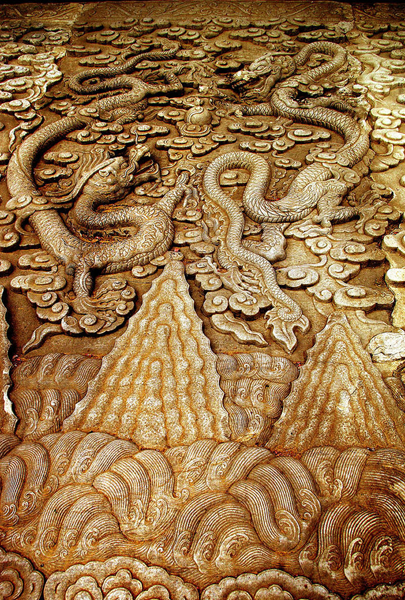

In [2]:
img_color = load("data/Noise_datasets/train/ground_truth/1.png")

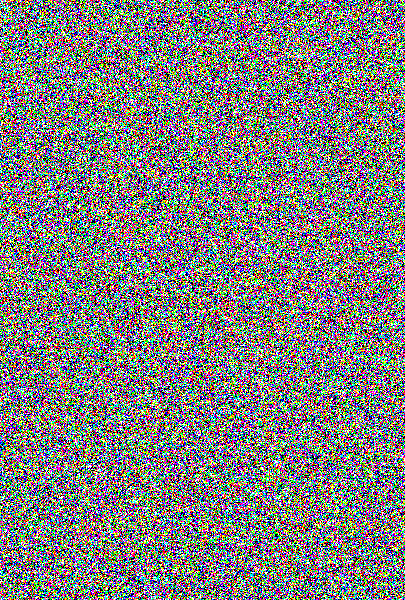

In [20]:
add_gauss(img_color, noise_level, 0.0)

### image gradient check

In [3]:
size(img_color)

(600, 405)

In [4]:
img = convert_to_3d(img_color)

600×405×3 Array{Float64, 3}:
[:, :, 1] =
 0.0156863  0.00392157  0.00392157  …  0.0196078   0.0117647   0.0117647
 0.0117647  0.0117647   0.00392157     0.00392157  0.00392157  0.00784314
 0.0156863  0.0196078   0.0156863      0.0235294   0.0196078   0.0196078
 0.0196078  0.0117647   0.027451       0.129412    0.121569    0.129412
 0.129412   0.121569    0.105882       0.0823529   0.0588235   0.0705882
 0.231373   0.317647    0.262745    …  0.0784314   0.113725    0.0862745
 0.266667   0.278431    0.219608       0.0941176   0.141176    0.129412
 0.270588   0.196078    0.141176       0.0784314   0.0352941   0.0666667
 0.227451   0.207843    0.121569       0.0431373   0.121569    0.176471
 0.262745   0.121569    0.027451       0.121569    0.203922    0.2
 0.180392   0.184314    0.156863    …  0.14902     0.113725    0.184314
 0.356863   0.345098    0.309804       0.192157    0.14902     0.215686
 0.415686   0.309804    0.207843       0.176471    0.129412    0.152941
 ⋮                   

In [5]:
size(img)

(600, 405, 3)

In [8]:
img = permutedims(reshape(img, (1, 600, 405, 3)), (2,3,4,1))

600×405×3×1 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0156863  0.00392157  0.00392157  …  0.0196078   0.0117647   0.0117647
 0.0117647  0.0117647   0.00392157     0.00392157  0.00392157  0.00784314
 0.0156863  0.0196078   0.0156863      0.0235294   0.0196078   0.0196078
 0.0196078  0.0117647   0.027451       0.129412    0.121569    0.129412
 0.129412   0.121569    0.105882       0.0823529   0.0588235   0.0705882
 0.231373   0.317647    0.262745    …  0.0784314   0.113725    0.0862745
 0.266667   0.278431    0.219608       0.0941176   0.141176    0.129412
 0.270588   0.196078    0.141176       0.0784314   0.0352941   0.0666667
 0.227451   0.207843    0.121569       0.0431373   0.121569    0.176471
 0.262745   0.121569    0.027451       0.121569    0.203922    0.2
 0.180392   0.184314    0.156863    …  0.14902     0.113725    0.184314
 0.356863   0.345098    0.309804       0.192157    0.14902     0.215686
 0.415686   0.309804    0.207843       0.176471    0.129412    0.152941
 ⋮              

In [10]:
function gradient(img)
    h_dev = (img[1:end-1,2:end,:,:] - img[1:end-1,1:end-1,:,:])
    v_dev = (img[2:end,1:end-1,:,:] - img[1:end-1,1:end-1,:,:])
    grad = (h_dev+v_dev) .* 0.5
    return grad
end

gradient (generic function with 1 method)

In [13]:
g = gradient(img)

599×404×3×1 Array{Float64, 4}:
[:, :, 1, 1] =
 -0.00784314   0.00392157    0.00392157  …  -0.0117647   -0.00392157
  0.00196078   2.32831e-10   0.00588235      0.00980392   0.00980392
  0.00392157  -0.00588235    0.00392157      0.0509804    0.0509804
  0.0509804    0.0627451     0.045098       -0.027451    -0.027451
  0.0470588    0.0901961     0.145098       -0.0137255    0.0333333
  0.0607843   -0.0470588     0.0254902   …   0.0254902    3.72529e-9
  0.00784314  -0.0705882    -0.0431373       0.0156863   -0.0588235
 -0.0588235   -0.0215686    -0.0196078      -0.0392157    0.0588235
  0.00784314  -0.0862745    -0.0686274       0.0784314    0.0686275
 -0.111765    -0.0156863     0.103922        0.054902    -0.0470588
  0.0901961    0.0666667     0.0843137   …   0.00392156   0.0529412
  0.0235294   -0.0352941    -0.0784314      -0.0294118    0.0235294
 -0.207843    -0.137255     -0.0176471       0.072549     0.0764706
  ⋮                                      ⋱               
 -0.011764

In [15]:
g[346, 235,2,1]

1.4901161193847656e-8